---

# Lecture 4.1. Gradient Descent

As observed in a previous lecture, we may train a single neurons weights and bias by iteratively applying a predefined rule. The description that we gave for the perceptron update rule was intended to hint at a more general rule for *optimizing the cost function of a model*. More specifically, we were hinting at a general continuous optimization technique called **gradient descent**. 


## 4.1.1  Minimizing a Single Variable Function
In order to understand gradient descent we will need to import the following python packages and define a simple function of one variable. 
```python
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return (w - 2)**2  + 1

# Define domain variables for plotting f
domain = np.linspace(-2, 6, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()
```


---

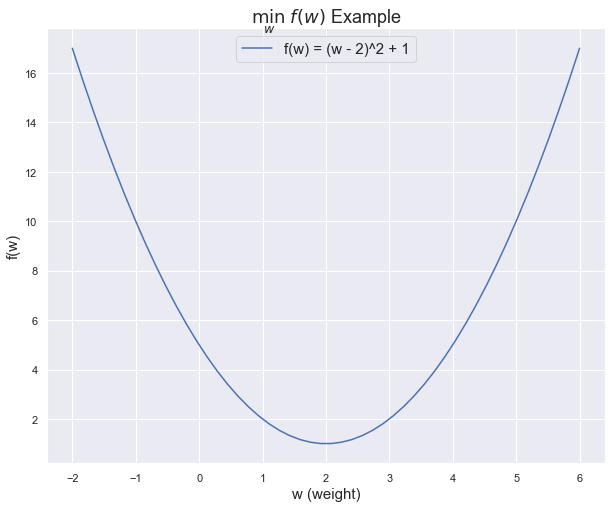

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set Seaborn theme for plots
sns.set_theme()

# Define test function for experimenting
def f(w):
    return (w - 2)**2  + 1

# Define domain variables for plotting f
domain = np.linspace(-2, 6, 50)

# Plot the function f(w)
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "f(w) = (w - 2)^2 + 1")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(w)$ Example", fontsize = 18)
plt.show()

---

## 4.1.1 The Problem Description

Clearly the function $f(w) = (w - 2)^2 + 1$ has a **global minimum** at $w = 2$. Supposing we did not already know the answer, how could we find it? That is, we wish to solve:

$$
\min_{w\in \mathbb{R}} f(w) \:\:\:\:\:\:\:\:\:\: (\text{PROBLEM 1})
$$

This class of problems falls into the reahlm of *unconstrained continuous optimization*. For those of you that are more mathematically inclined, see the excellent and classic text of [Nocedal and Wright](http://egrcc.github.io/docs/math/numerical-optimization.pdf) for an in-depth treatment of the subject.

The treatment of PROBLEM 1 given by Nocedal and Wright is extensive and goes much further than what is currently implemented in machine learning; with some notable exceptions appearing in the literature. Noting these techniques, this notebook focuses on the notion of using the *gradient* (the generalization of the single variable function derivative) in order to "search" for plausable minimum of a function. 

### - Start with a Guess
Suppose we first guess that the minimum value of $f(w)$ occurs at $w_0 = 5$. We can visualize the point $(5, f(5))$ by running the following code in the cell below. 
```python
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter([5], [f(5)], color = "magenta", label = "$w_0$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()
```

---

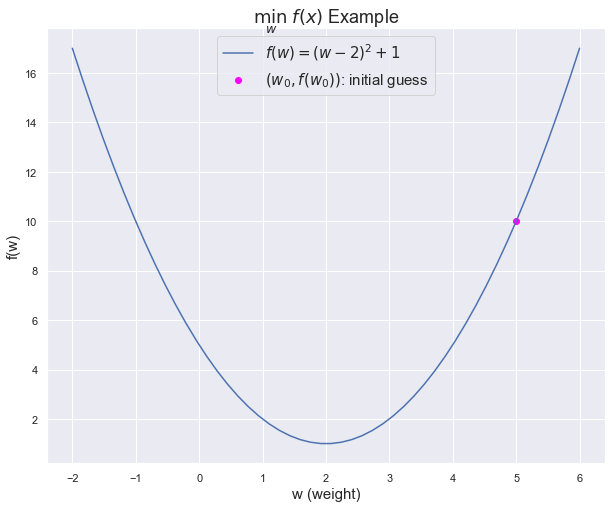

In [2]:
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter([5], [f(5)], color = "magenta", label = "$(w_0, f(w_0))$: initial guess")
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

---


### - The General Idea 
The general idea behind gradient descent is to use the gradient (the derivative for single variable functions) to *provide a direction to explore* (this means gradient descent is a **first-order method**). For example, with our function $f$ and initial guess $w_0 = 5$, suppose we are able to calculate the value of the *gradient* (the derivative) of $f(w)$ at $w_0 = 5$. This numerical value will give us the *slope of the tangent line* to $f(w)$ at $w_0$. Note that $f'(w) = 2(w - 2)$.

As a very relevant example, I would like to mention that I am currently recovering from surgery 6 weeks ago on a broken fibula (smaller leg bone). Recently I started walking around (sorta), and whenever I encounter a new incline, I most definitely remember that I'm trying to optimize a function... 

Specifically, notice that when my character is standing on a 2-dimensional incline it seems obvious how to minimize the pain incured by a steep incline. This intuitive notion is mathematically calculated by understanding the slope of the tangent line to the curve I'm currently standing on... 

Me in Spring 2022
---

<p align="center">
    <img src="my_loss_function.png" width="700" hight ="800">
</p>

---



We can even visualize this tangent line by running the following code in the cell below. 

```python
# Define parabola derivative
def df(w): 
    return 2*(w - 2)

# Choose w_0
w_0 = 5.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)
    
    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            'C1--', 
            linewidth = 1, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i})")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()
```



---

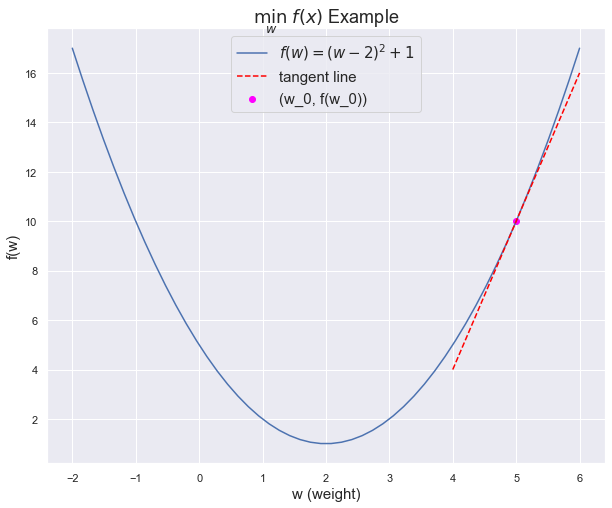

In [3]:
# Define parabola derivative
def df(w): 
    return 2*(w - 2)

# Choose w_0
w_0 = 5.0

# Define tangent line function for visualization
def tangent_line(w_i, function, derivative, i = 0, color = "magenta", show = True):
    # Define tangent line
    # y = m*(x - x1) + y1
    def line(w):
        return derivative(w_i)*(w - w_i) + function(w_i)

    wrange = np.linspace(w_i - 1, w_i + 1, 10)
    if show:
        plt.plot(wrange,
            line(wrange), 
            '--', 
            linewidth = 1.5, 
            color = "red", 
            label = "tangent line")
    plt.scatter([w_i], [function(w_i)], color = color, label = f"(w_{i}, f(w_{i}))")

# Plot the figure
plt.figure(figsize = (10, 8))
# Plot the function
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
# Visualize the tangent line
tangent_line(w_0, f, df)

# Label the figure
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("$\min_w$ $f(x)$ Example", fontsize = 18)
plt.show()

---

## 4.1.2 Direction of Descent and the Learning Rate

Observing the figure generated by the code above, notice that the tangent line implies a direction of descent. That is, at the point $(5, f(5))$, the tangent line has a positive slope. This indicates that we need move in the negative direction (to the left of $w_0 = 5$) if we wish to move to a smaller value of $f(w)$. That is, **we need to move in the direction opposite of the sign of the derivative of $f(w)$ at $w_0 = 5$**.

### - But how far should we move? 
The value of how far to move in the opposite sign of the derivative of $f(w)$ at $w_0 = 5$ is called the **learning rate** (Nocedal & Wright call this *hyperparameter* the **step length**), and is typically denoted by $\alpha$. The process of multiplying the derivative of $f(w)$ at $w_0 = 5$ by the learning rate and forming a new choice of $w$ by subtracting this quantity from $w_0$ is called **gradient descent**. For example, we may apply gradient descent at $w_0$ and form a new $w$, say $w_1$, with the following update:

$$
w_{n+1} = w_n - \alpha f'(w_n) \:\:\:\:\:\:\:\:\:\: (\text{Gradient Descent Update Rule for a Function of one Variable})
$$

The choice of $\alpha$ in machine learning is typically found by experimentation, though more sophesticated techniques are available, such as *line-search* and *trust-region* methods (again see Nocedal & Wright). 

We can implement one iteration of the gradient descent algorithm by choosing $\alpha = 0.8$ and then running the following code in the cell below. 
```python
# Initialize choice of w
w_0 = 5.0

# Set learning rate 
alpha = .8

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()
```

---

w_0 = 5.0
w_1 = 0.1999999999999993


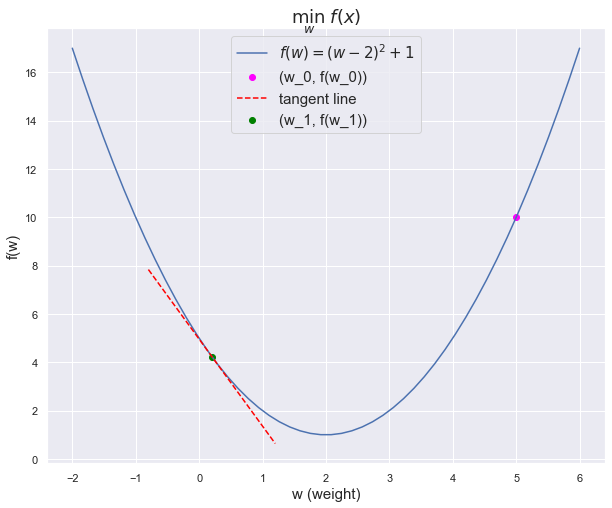

In [4]:
# Initialize choice of w
w_0 = 5.0

# Set learning rate 
alpha = .8

# Moving in the opposite direction of the derivative at w_0
w_1 = w_0 - alpha*df(w_0)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()


---

Notice that the new guess $w_1$ gives a new pair $(w_1, f(w_1))$ which is a better choice of a both a *extrema* and minimum value for $f$ than the initial guess $w_0$ would have given. **We are moving downhill on the function $f$.** Let us move again and see where we end up by running the following code in the cell below. 
```python
# Moving in the opposite direction of the derivative at w_1
w_2 = w_1 - alpha*df(w_1)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()
```

---

w_0 = 5.0
w_1 = 0.1999999999999993
w_2 = 3.0800000000000005


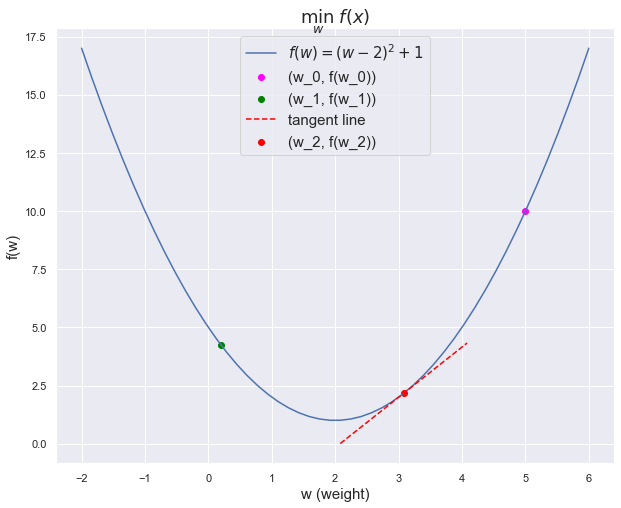

In [5]:
# Moving in the opposite direction of the derivative at w_1
w_2 = w_1 - alpha*df(w_1)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

---

And one more time by running the following code in the cell below.
```python
# Moving in the opposite direction of the derivative at w_2
w_3 = w_2 - alpha*df(w_2)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")
print(f"{w_3 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red", show = False)
tangent_line(w_3, f, df, i = 3, color = "purple")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()
```


---

w_0 = 5.0
w_1 = 0.1999999999999993
w_2 = 3.0800000000000005
w_3 = 1.3519999999999996


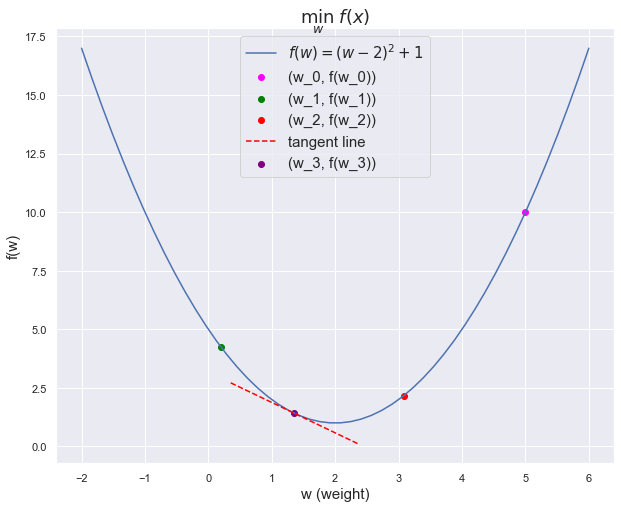

In [6]:
# Moving in the opposite direction of the derivative at w_2
w_3 = w_2 - alpha*df(w_2)

# Print the sequence of w variables
print(f"{w_0 = }")
print(f"{w_1 = }")
print(f"{w_2 = }")
print(f"{w_3 = }")

# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")

# Visualize the tangent lines
tangent_line(w_0, f, df, show = False)
tangent_line(w_1, f, df, i = 1, color = "green", show = False)
tangent_line(w_2, f, df, i = 2, color = "red", show = False)
tangent_line(w_3, f, df, i = 3, color = "purple")

# Plot labels
plt.xlabel("w (weight)", fontsize = 15)
plt.ylabel("f(w)", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title("$\min_w$ $f(x)$", fontsize = 18)
plt.show()

---

We can easily iterate this process of updating $w_i$ by writing a function called ```derivative_descent```. Try running the following code in the cell below. 
```python
def derivative_descent(derivative, alpha = 0.8, w_0 = 5.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()
```

---

w_0 = 5.0 | df(w_0) = 6.0
w_1 = 0.2 | df(w_1) = -3.6000000000000014
w_2 = 3.08 | df(w_2) = 2.160000000000001
w_3 = 1.35 | df(w_3) = -1.2960000000000007
w_4 = 2.39 | df(w_4) = 0.7776000000000005
w_5 = 1.77 | df(w_5) = -0.4665600000000003
w_6 = 2.14 | df(w_6) = 0.2799360000000002
w_7 = 1.92 | df(w_7) = -0.16796159999999993
w_8 = 2.05 | df(w_8) = 0.10077696000000014
w_9 = 1.97 | df(w_9) = -0.06046617600000026
w_10 = 2.02 | df(w_10) = 0.036279705600000156
w_11 = 1.99 | df(w_11) = -0.02176782336000027
w_12 = 2.01 | df(w_12) = 0.013060694016000518
w_13 = 2.0 | df(w_13) = -0.00783641640960031
w_14 = 2.0 | df(w_14) = 0.004701849845759831
w_15 = 2.0 | df(w_15) = -0.0028211099074559876
w_16 = 2.0 | df(w_16) = 0.0016926659444731484
w_17 = 2.0 | df(w_17) = -0.0010155995666840667
w_18 = 2.0 | df(w_18) = 0.0006093597400100847



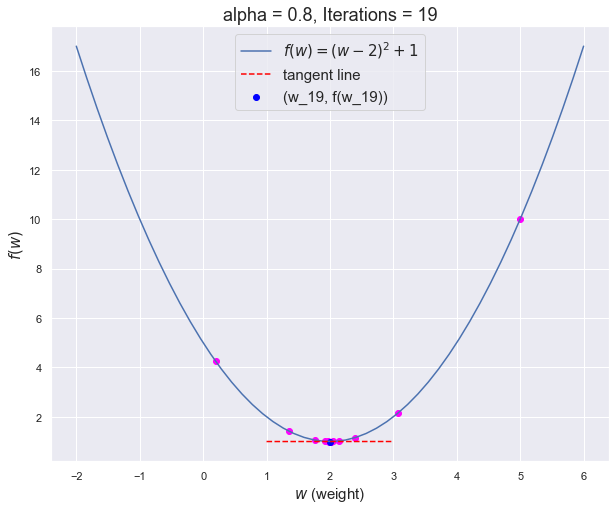

In [7]:
def derivative_descent(derivative, alpha = 0.8, w_0 = 5.0, max_iter = 1_000):
    W = [w_0]
    i = 0
    while abs(derivative(W[-1])) > 0.001 and i < max_iter:
        w_new = W[-1] - alpha*df(W[-1])
        W.append(w_new)
        i += 1
    W = np.array(W)

    return W

W = derivative_descent(df)

for i, w in enumerate(W):
    print(f"w_{i} = {np.round(w, decimals = 2)} | df(w_{i}) = {df(w)}")
print("")


# Plot the figure
plt.figure(figsize = (10, 8))
plt.plot(domain, f(domain), label = "$f(w) = (w - 2)^2 + 1$")
plt.scatter(W, f(W), color = "magenta")
tangent_line(W[-1], f, df, i = len(W), color = "blue")
plt.xlabel("$w$ (weight)", fontsize = 15)
plt.ylabel("$f(w)$", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper center")
plt.title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
plt.show()


---


Me in Spring 2022 After Reaching a Place to Sit!
---

<p align="center">
    <img src="Valhalla.png" width="700" hight ="800">
</p>

---




### - Testing different choices of the Learning Rate $\alpha$
We can test how well our choice of the learning rate $\alpha$ was by comparing it to different choices of $\alpha$. Try running the following code in the cell below. What do you observe?
```python
# Possible choices of learning rate 
alphas = [0.1, 0.5, 0.8, 0.9]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)
```

---

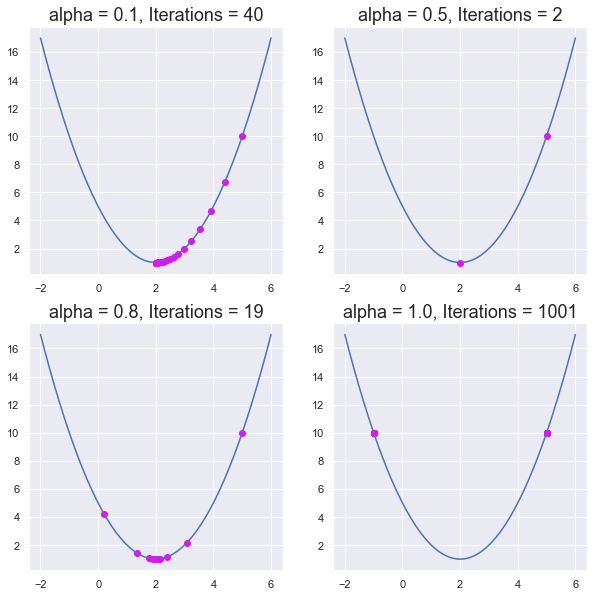

In [8]:
# Possible choices of learning rate 
alphas = [0.1, 0.5, 0.8, 1.0]

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    W = derivative_descent(df, alpha = alpha)
    ax.plot(domain, f(domain))
    ax.scatter(W, f(W), color = "magenta")
    ax.set_title(f"alpha = {alpha}, Iterations = {len(W)}", fontsize = 18)


---

## 4.1.3 Minimizing Functions of Several Variables

All of the ideas above naturally generalize to functions of several variables when substituting the gradient for the single variable derivative. Before discussing this notion, we emphasize the general uncrontrained optimization problem:

$$
\min_{w\in \mathbb{R^n}} f(w) \:\:\:\:\:\:\:\:\:\: (\text{PROBLEM 2})
$$

For instructional purposes we next give a specific solution to this problem by focusing on a function of two variables, though all notions covered extend to functions of an arbitrary and finite number of variables. In a general manor, gradient descent can now be defined in a meaningful sense:

$$
w \leftarrow w - \alpha \nabla f(w) \:\:\:\:\:\:\:\:\:\: (\text{True Gradient Descent})
$$




With this multivariable gradient descent defined we now consider the multivariable function $f(w_0, w_1) = w_0^2 + w_1^2 + 1$ which has an obvious minimum at the vector $\mathbf{w} = [0.0, 0.0]^T$. To visualize this function run the following code in the cell below.
```python
from mpl_toolkits import mplot3d

def f(w_0, w_1):
    return w_0 ** 2 + w_1 ** 2 + 1

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()
```

---

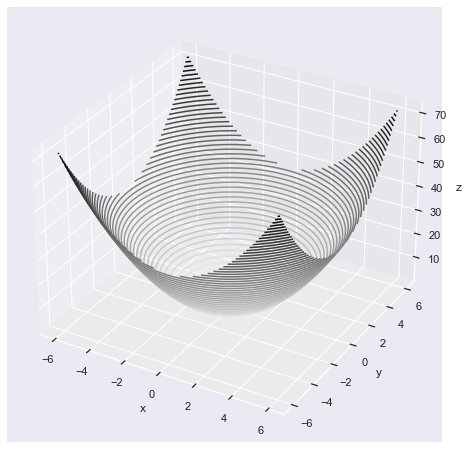

In [9]:
from mpl_toolkits import mplot3d

def f(w_0, w_1):
    return w_0 ** 2 + w_1 ** 2 + 1

x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

---

The figure shown by the previous code cell can be a bit hard to visualize. We can work around this problem try running the following code in the cell below. 
```python
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(60, 35)
plt.show()
```

---

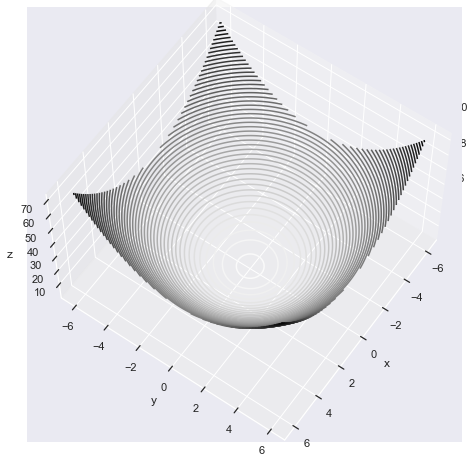

In [10]:
x = np.linspace(-6, 6, 300)
y = np.linspace(-6, 6, 300)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


ax.view_init(60, 35)
plt.show()

---

### - True Gradient Descent 
Now that we have a good visualization of our multivariable function we next define the derivative of our function and also update our gradient descent function to work with such functions. Next run the following code in the cell below. 
```python
def df(w):
    grad = [2*w[0], 2*w[1]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()
```



---

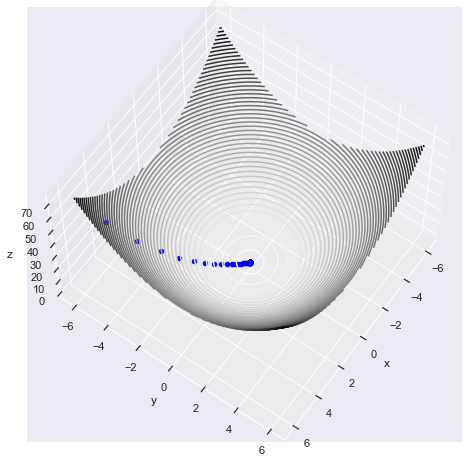

In [11]:
def df(w):
    grad = [2*w[0], 2*w[1]]
    return np.array(grad)

def gradient_descent(derivative, W, alpha = 0.8, max_iter = 1_000):
    i = 0
    W_hist = [W]
    while i < max_iter:
        W = W - alpha*df(W)
        i += 1
        W_hist.append(W)

    return W_hist

W = gradient_descent(df, np.array([5.0, -5.0]), alpha = 0.1, max_iter=500)

x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
for i in range(len(W)):
    ax.scatter3D([W[i][0]], 
                 [W[i][1]], 
                 [f(W[i][0], W[i][1])], color = "blue")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 35)
plt.show()

---

## 4.1.4 Conclusion

As we have demonstrated in this notebook, gradient descent is a simple way to optimize convex functions. In the next notebook we show how this iterative method can be used to train single neuron models! 




---